In [11]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt

from training.util import sgd, plot_losses

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import experiments.base.cifar as cifar

batch_size = 4
trainloader = cifar.cifar10_trainloader("./data", batch_size=batch_size)
testloader = cifar.cifar10_testloader("./data", batch_size=batch_size)

170499072it [02:14, 1271066.24it/s]                               


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
device = torch.device("cuda")

In [13]:
from training.pp import MAP

layers = [
    ("drop-preresnet-20", (32, 3, 10, 0.1)),
    ("logsoftmax", ())
]

pp = MAP(layers)
pp.train_model(5, torch.nn.NLLLoss(), sgd(0.001), trainloader, batch_size, device)

Epoch 0: loss 0.5237683057785034
Epoch 1: loss 0.4709496796131134
Epoch 2: loss 0.44889581203460693
Epoch 3: loss 0.42979714274406433
Epoch 4: loss 0.4085431694984436
Final loss 0.4085431694984436


In [14]:
import experiments.base.multiclass_classification as exp

exp.eval_model(pp, 5, testloader, device)

 Accuracy: 0.5169000029563904
 ECE: 0.18702261159867048


(tensor(0.5169),
 <training.calibration.ClassificationCalibrationResults at 0x17784c06850>)

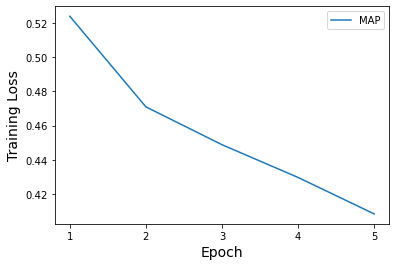

In [15]:
plot_losses("MAP", pp.all_losses(), plt.subplot())